<a href="https://colab.research.google.com/github/Danie110001001109192912/Drug_classification/blob/main/Drogas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The target feature is
* Drug type

The feature sets are:
* Age
* Sex
* Blood Pressure Levels (BP)
* Cholesterol Levels
* Na to Potassium Ration

Inspiration

The main problem here in not just the feature sets and target sets but also the approach that is taken in solving these types of problems as a beginner. So best of luck.

> Objetivo é dadas ascaracterpisticas, prever qual a droga será usada no tratamento

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns


In [2]:
drug = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/drug200.csv')

drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
print(len(drug.columns))

6


In [4]:
# c = 0
# for col in range(0, len(drug.columns) ):
#    # o problema esta em drug[col] ou drug[número]
#   print(drug[col].value_counts())
#   print('___'* 30)

In [5]:
col = drug.columns.tolist()

for c in range(0, len(drug.columns) ):

  print(drug[col[c]].value_counts())
  print('___'* 30)


47    8
23    7
28    7
49    7
39    6
32    6
50    5
37    5
58    5
60    5
22    5
34    4
72    4
51    4
42    4
26    4
24    4
74    4
67    4
68    4
61    4
56    4
20    4
36    4
45    4
41    4
31    4
43    4
65    4
57    4
53    3
40    3
70    3
59    3
16    3
38    3
15    3
69    3
35    3
18    3
64    3
52    2
55    2
62    2
19    2
29    2
66    2
73    2
46    2
48    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: Age, dtype: int64
__________________________________________________________________________________________
M    104
F     96
Name: Sex, dtype: int64
__________________________________________________________________________________________
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64
__________________________________________________________________________________________
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64
___________________________________________________________________________________

* 5 tipos de drogas 

[ DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16]
* categorico nominal
* muito mais drug Y ( pode ser besbalanciado, porem não é mais que 1000vezes



> na_to_K - numérica continua

> colesterol 2 tipos high e normal

> bp - 3 tipos low,hight, normal

> age = numerica discreta


In [6]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Categorias certas

In [7]:
# for v in drug.columns.tolist():
for v in drug.columns:
  print(drug[v].duplicated().sum(), v)

143 Age
198 Sex
197 BP
198 Cholesterol
2 Na_to_K
195 Drug


Varios valores duplicados, patricamente o df todo em algumas colunas

In [8]:
# selecionar apenas as linhas duplicadas
duplicated_rows = drug[drug.duplicated()].sum()
duplicated_rows


Age            0.0
Sex            0.0
BP             0.0
Cholesterol    0.0
Na_to_K        0.0
Drug           0.0
dtype: float64

In [9]:
# tentar pegar as colunas sem fazer o loop

v = drug[:0] 


In [10]:
drug.shape

(200, 6)

In [11]:
drug.isnull().sum()

#sem valores núlos

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Sem outiliers

In [12]:
drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


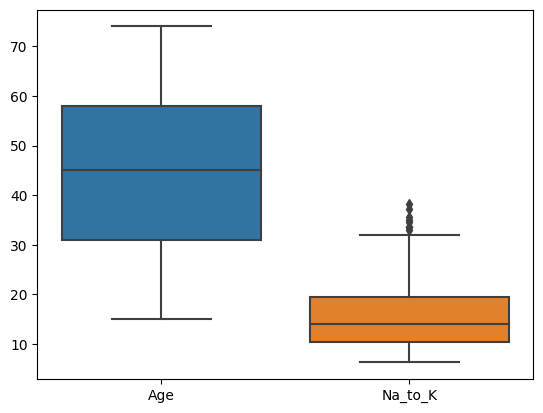

In [13]:
# plt.figure(figsize = (20, 10))
sns.boxplot(drug)

drug1 = drug[ drug['Na_to_K'] < drug['Na_to_K'].quantile(0.99) ]


<Axes: >

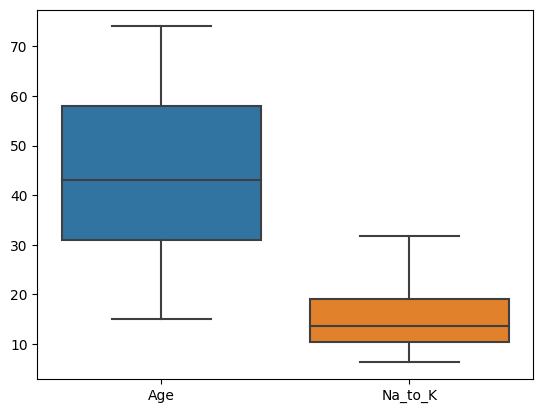

In [14]:
drug1 = drug[ drug['Na_to_K'] < drug['Na_to_K'].quantile(0.959) ]
sns.boxplot(drug1)

In [15]:
drug1.describe()

,Age,Na_to_K
count,191.000000,191.000000
mean,44.287958,15.205832
std,16.534678,6.101940
min,15.000000,6.269000
25%,31.000000,10.423000
50%,43.000000,13.598000
75%,58.000000,18.999000
max,74.000000,31.686000


##Trasformando categoricos em numéricos

> Trasformar os categoricos em numéricos para fazer EDA é valido neste momento ? Pq vão se criar varias colunas extras as quais é preciso juntar em uma so para dar o split nos dados

* One-Hot Encoding: --> usar no processamento de machine learning

O One-Hot Encoding é uma técnica para transformar valores categóricos em um conjunto de valores binários. Cada categoria é representada por um vetor binário, onde apenas um valor é 1 e os outros são 0. Você pode usar o get_dummies() do Pandas para fazer isso. Veja um exemplo:



```
# aplicar o one-hot encoding na coluna 'categoria'
one_hot = pd.get_dummies(df['categoria'])

# concatenar o DataFrame original com o resultado do one-hot encoding

# o get_dummies pode criar novas colunas, e esse comando junta o df com as novas colunas criadas
df = pd.concat([df, one_hot], axis=1)

```

esse comando trasforma tudo em númerico de forma binaria, mesmo que tenham mais que uma categoria, o valor será binario'

EX:
dado com 3 categorias 

Value_conts()

0  1  2 --> as 3 categorias

1  0  0  -->  77

0  1  0 -->   64

0  1 -->   59
dtype: int64


In [16]:
one_hot = pd.get_dummies(drug)

# trasformou a coluna Drug em varias
one_hot.describe()

drug0 = pd.concat([drug, one_hot], axis=1)
drug0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 200 non-null    int64  
 1   Sex                 200 non-null    object 
 2   BP                  200 non-null    object 
 3   Cholesterol         200 non-null    object 
 4   Na_to_K             200 non-null    float64
 5   Drug                200 non-null    object 
 6   Age                 200 non-null    int64  
 7   Na_to_K             200 non-null    float64
 8   Sex_F               200 non-null    uint8  
 9   Sex_M               200 non-null    uint8  
 10  BP_HIGH             200 non-null    uint8  
 11  BP_LOW              200 non-null    uint8  
 12  BP_NORMAL           200 non-null    uint8  
 13  Cholesterol_HIGH    200 non-null    uint8  
 14  Cholesterol_NORMAL  200 non-null    uint8  
 15  Drug_DrugY          200 non-null    uint8  
 16  Drug_dru

Todos estão entre 0 e 1 , porém eu não so tenho 2 categorias nos dados

* Label Encoding: 

O Label Encoding é uma técnica para transformar valores categóricos em valores numéricos simples. Cada categoria é atribuída a um número inteiro, começando do zero. Você pode usar o LabelEncoder do scikit-learn para fazer isso. Veja um exemplo:


```
from sklearn.preprocessing import LabelEncoder

# criar um objeto LabelEncoder
le = LabelEncoder()

# transformar a coluna 'categoria' em valores numéricos
df['categoria_numerica'] = le.fit_transform(df['categoria'])

```



In [17]:
from sklearn.preprocessing import LabelEncoder

# criar um objeto LabelEncoder
le = LabelEncoder()

# transformar a coluna 'categoria' em valores numéricos
drug['Drug'] = le.fit_transform(drug['Drug'])

# Não funciona com todo o dataFrame

drug['Drug'].value_counts()

drug['Drug'].head()

0    0
1    3
2    3
3    4
4    0
Name: Drug, dtype: int64

#EDA

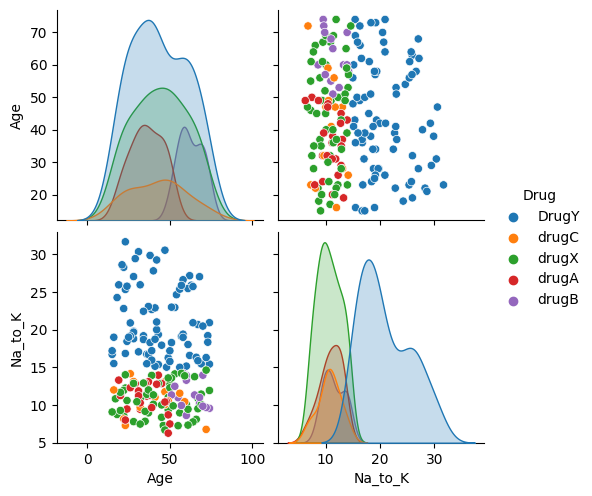

In [18]:
sns.pairplot(drug1, hue = 'Drug') # hue = 'DrugY' = não funciona pq tem que ser o nome da coluna não dos objetos dentro dela

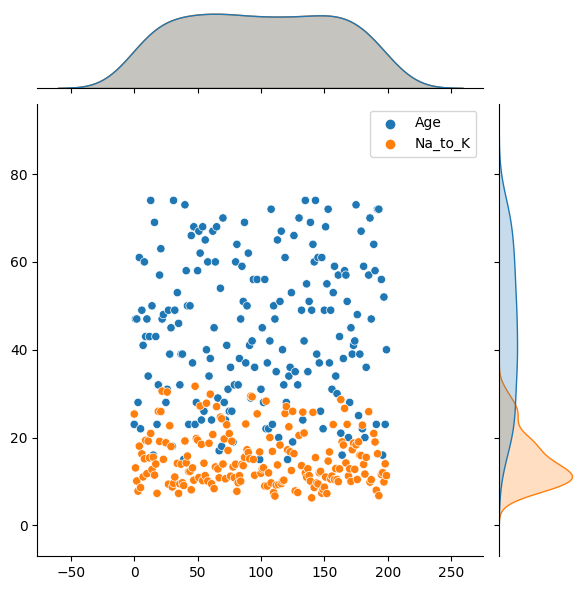

In [19]:
sns.jointplot(drug1)

# Pre-processing

In [42]:
c_drug = ['Drug_drugX', 'Drug_drugC', 'Drug_drugB',  'Drug_drugA', 'Drug_DrugY']

y = one_hot['Drug_DrugY']
x = one_hot.drop( columns = c_drug, axis = 1)


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

X_train.shape,   X_test.shape

((134, 9), (66, 9))

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

s_Xtrain = scaler.fit_transform(X_train)
s_Xtest = scaler.fit_transform(X_test)

Machine learing

In [54]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(s_Xtrain, y_train)

SVC()

In [58]:
pred = svc.predict(s_Xtest)


[0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0
 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1]


<Axes: >

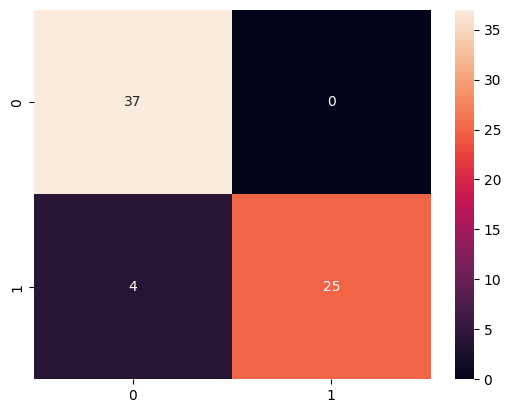

In [61]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred)

sns.heatmap(cm, annot = True)

In [62]:
from sklearn.metrics import classification_report


print(classification_report(y_test,pred ))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95        37
           1       1.00      0.86      0.93        29

    accuracy                           0.94        66
   macro avg       0.95      0.93      0.94        66
weighted avg       0.95      0.94      0.94        66

